In [3]:
from PIL import Image
import os
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

def load_and_resize_images(image_paths, new_size):
    images = []
    for image_path in image_paths:
        img = Image.open(image_path)
        img_resized = img.resize(new_size)
        img_array = np.array(img_resized)
        images.append(img_array)
    return np.array(images)

parent_folder_path ="C:\\Users\\manju\\OneDrive\\Desktop\\train"

emotions = ['anger', 'sad', 'happy', 'surprise','neutral','fear','disgust']
data = {}
for emotion in emotions:
    emotion_folder_path = os.path.join(parent_folder_path, emotion)
    image_files = glob.glob(os.path.join(emotion_folder_path, '*.jpg'))
    images = load_and_resize_images(image_files, new_size=(64, 64))
    data[emotion] = images

# Convert the labels to numerical format
# Convert the labels to numerical format
# Convert the labels to numerical format
label_mapping = {label: i for i, label in enumerate(emotions)}
y = []
X = []
for emotion, images in data.items():
    labels = [emotion] * len(images)
    y.extend(labels)
    X.extend(images)

# Debugging: Print unique labels and the label mapping
unique_labels = set(y)
print("Unique labels:", unique_labels)
print("Label mapping:", label_mapping)

# Convert lists to numpy arrays
X = np.array(X)

# Debugging: Print labels before conversion
# Debugging: Print unique labels and the label mapping
unique_labels = set(y)
print("Unique labels:", unique_labels)
print("Label mapping:", label_mapping)

# Ensure the number of classes in your model matches the actual number of unique labels
num_classes = len(set(y_numeric))
print("Number of classes in the model:", num_classes)

# Check if there are any unexpected label values
unexpected_labels = set(y_numeric) - set(range(num_classes))
print("Unexpected label values:", unexpected_labels)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)



# Convert lists to numpy arrays
X = np.array(X)
y_numeric = np.array([label_mapping[label] for label in y])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for compatibility with ImageDataGenerator
X_train = X_train.reshape(-1, 64, 64, 1)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Learning Rate Scheduler
def schedule(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(schedule)

# Adjust the output layer to have the correct number of units
model = models.Sequential([
    layers.Conv2D(256, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(len(emotions), activation='softmax')  # Output layer with the number of classes
])

# Update the label mapping
label_mapping = {label: i for i, label in enumerate(emotions)}

# Convert labels to numerical format
y_numeric = np.array([label_mapping[label] for label in y])

# ...

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


# Train the model with augmented data and learning rate scheduler
model.fit(datagen.flow(X_train, y_train, batch_size=32), 
          epochs=5, 
          validation_data=(X_test, y_test), 
          callbacks=[lr_scheduler])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Save the model
model.save('C:\\Users\\manju\\OneDrive\\Desktop\\ManjuNATH21')


Unique labels: {'happy', 'neutral', 'disgust', 'sad', 'surprise', 'fear'}
Label mapping: {'anger': 0, 'sad': 1, 'happy': 2, 'surprise': 3, 'neutral': 4, 'fear': 5, 'disgust': 6}
Unique labels: {'happy', 'neutral', 'disgust', 'sad', 'surprise', 'fear'}
Label mapping: {'anger': 0, 'sad': 1, 'happy': 2, 'surprise': 3, 'neutral': 4, 'fear': 5, 'disgust': 6}


NameError: name 'y_numeric' is not defined

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from PIL import Image
import os
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

def load_and_resize_images(image_paths, new_size):
    images = []
    for image_path in image_paths:
        img = Image.open(image_path)
        img_resized = img.resize(new_size)
        img_array = np.array(img_resized)
        images.append(img_array)
    return np.array(images)

parent_folder_path = "C:\\Users\\manju\\OneDrive\\Desktop\\train"

emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'suprise']
data = {}
for emotion in emotions:
    emotion_folder_path = os.path.join(parent_folder_path, emotion)
    image_files = glob.glob(os.path.join(emotion_folder_path, '*.jpg'))
    images = load_and_resize_images(image_files, new_size=(64, 64))
    data[emotion] = images

# Convert the labels to numerical format
label_mapping = {label: i for i, label in enumerate(emotions)}
y = []
X = []
for emotion, images in data.items():
    labels = [emotion] * len(images)
    y.extend(labels)
    X.extend(images)

# Convert lists to numpy arrays
X = np.array(X)
y_numeric = np.array([label_mapping[label] for label in y])

# Debugging: Print unique labels and the label mapping
unique_labels = set(y)
print("Unique labels:", unique_labels)
print("Label mapping:", label_mapping)

# Ensure the number of classes in your model matches the actual number of unique labels
num_classes = len(set(y_numeric))
print("Number of classes in the model:", num_classes)

# Check if there are any unexpected label values
unexpected_labels = set(y_numeric) - set(range(num_classes))
print("Unexpected label values:", unexpected_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.4, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for compatibility with ImageDataGenerator
X_train = X_train.reshape(-1, 64, 64, 1)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Learning Rate Scheduler
def schedule(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.2)

lr_scheduler = LearningRateScheduler(schedule)

# Adjust the output layer to have the correct number of units
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    
    layers.Dense(len(emotions), activation='softmax') 
])

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model with augmented data and learning rate scheduler
model.fit(datagen.flow(X_train, y_train, batch_size=32), 
          epochs=10, 
          validation_data=(X_test, y_test), 
          callbacks=[lr_scheduler])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Save the model
model.save('C:\\Users\\manju\\OneDrive\\Desktop\\ManjuNATH21')


Unique labels: {'neutral', 'disgust', 'happy', 'fear', 'angry', 'sad'}
Label mapping: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'suprise': 6}
Number of classes in the model: 6
Unexpected label values: set()
Epoch 1/10
596/596 [==============================] - 137s 227ms/step - loss: 1.8304 - accuracy: 0.2536 - val_loss: 1.6560 - val_accuracy: 0.2737 - lr: 0.0010
Epoch 2/10
596/596 [==============================] - 136s 228ms/step - loss: 1.6466 - accuracy: 0.2797 - val_loss: 1.6013 - val_accuracy: 0.2976 - lr: 0.0010
Epoch 3/10
596/596 [==============================] - 138s 232ms/step - loss: 1.6379 - accuracy: 0.2891 - val_loss: 1.6024 - val_accuracy: 0.2937 - lr: 0.0010
Epoch 4/10
596/596 [==============================] - 138s 232ms/step - loss: 1.6119 - accuracy: 0.3018 - val_loss: 1.5284 - val_accuracy: 0.3470 - lr: 0.0010
Epoch 5/10
596/596 [==============================] - 140s 236ms/step - loss: 1.5851 - accuracy: 0.3149 - val_loss: 1.4922 - 

INFO:tensorflow:Assets written to: C:\Users\manju\OneDrive\Desktop\ManjuNATH21\assets


1/1 [==============================] - 1s 628ms/step


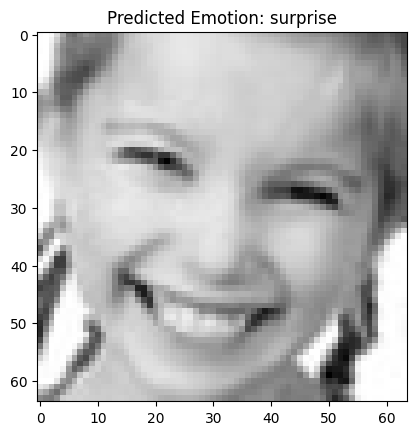

Stress not detected. Predicted Emotion: surprise


In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('C:\\Users\\manju\\OneDrive\\Desktop\\ManjuNATH21')

# Function to preprocess and predict the emotion of a given image
def predict_emotion(image_path, model):
    img = Image.open(image_path).resize((64, 64))
    
    # Convert the image to grayscale
    img = img.convert('L')
    
    # Convert the image to a numpy array
    img_array = np.array(img) / 255.0  # Normalize pixel values
    
    # Expand dimensions to make it compatible with model input shape
    img_array = np.expand_dims(img_array, axis=0)
    
    # Make the prediction
    prediction = model.predict(img_array)
    
    # Get the predicted emotion label
    predicted_label = np.argmax(prediction)
    
    # Map the predicted label to the corresponding emotion
    emotions = ['anger', 'sad', 'happy', 'surprise', 'neutral', 'fear', 'disgust']
    predicted_emotion = emotions[predicted_label]
    
    # Display the grayscale image
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Emotion: {predicted_emotion}")
    plt.show()

    return predicted_emotion

image_path = 'HAPPY.jpg'  # Replace with the path to your image
predicted_emotion = predict_emotion(image_path, model)

negative_emotions = ['anger', 'sad', 'fear', 'disgust']
if predicted_emotion in negative_emotions:
    print(f"Stress detected. Predicted Emotion: {predicted_emotion}")
else:
    print(f"Stress not detected. Predicted Emotion: {predicted_emotion}")
